**CASE STUDY - 10**

**Case Study on Applications of Unsupervised Learning** 

Problem Statement:
The given dataset on cars has information on different brands of cars. From this 
dataset, finding the different clusters using the parameters such as Horsepower, 
Cubic inches, Make year, etc. 
Trying out different the clustering techniques and building models with optimum 
number of clusters. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from google.colab import files

LOADING THE DATA

In [ ]:
uploaded= files.upload()

Saving cars.csv to cars.csv


In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['cars.csv'].decode('utf-8')))
print(df)

      mpg   cylinders   cubicinches   hp   weightlbs   time-to-60   year
0    14.0           8           350  165        4209           12   1972
1    31.9           4            89   71        1925           14   1980
2    17.0           8           302  140        3449           11   1971
3    15.0           8           400  150        3761           10   1971
4    30.5           4            98   63        2051           17   1978
..    ...         ...           ...  ...         ...          ...    ...
256  17.0           8           305  130        3840           15   1980
257  36.1           4            91   60        1800           16   1979
258  22.0           6           232  112        2835           15   1983
259  18.0           6           232  100        3288           16   1972
260  22.0           6           250  105        3353           15   1977

[261 rows x 7 columns]


FEATURE DESCRIPTION

In [ ]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [ ]:
df.shape

(261, 7)

In [ ]:
df.dtypes

mpg             float64
 cylinders        int64
 cubicinches      int64
 hp               int64
 weightlbs        int64
 time-to-60       int64
 year             int64
dtype: object

DATA VISUALIZATION

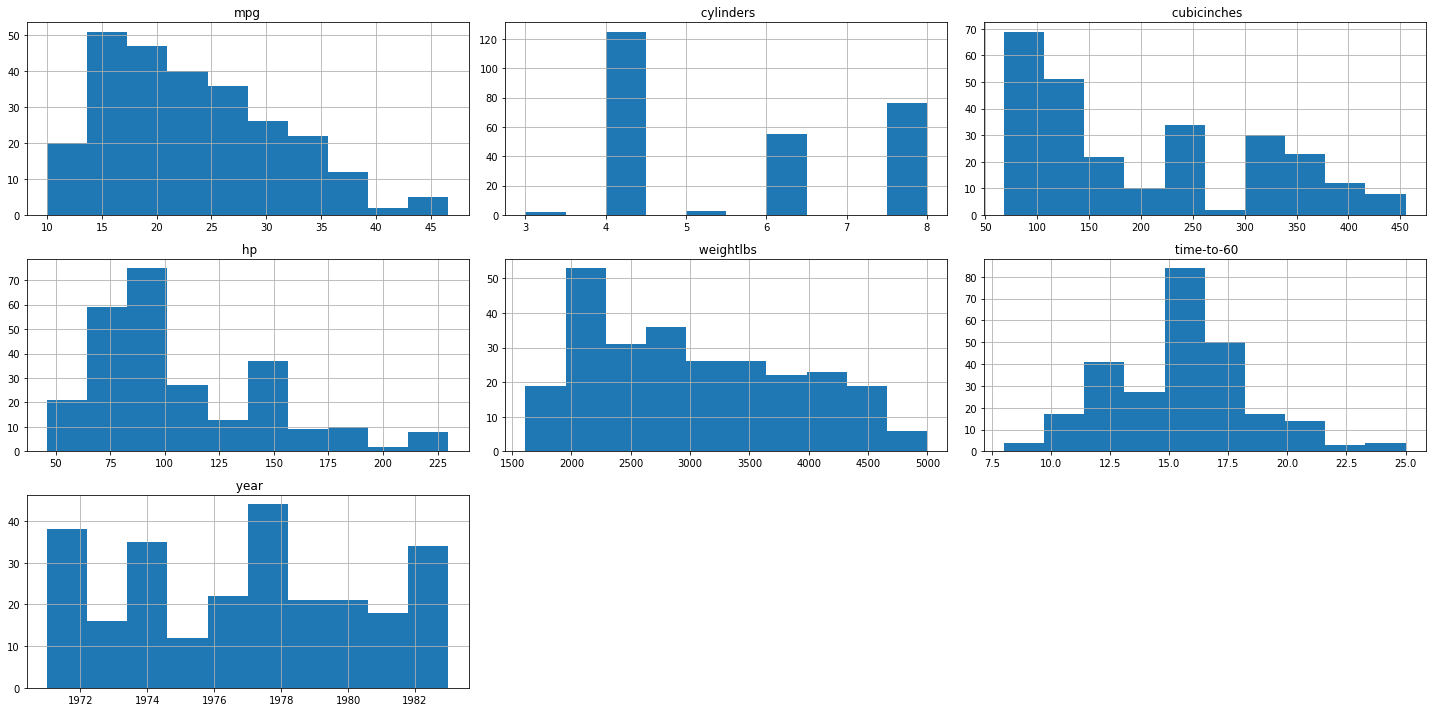

In [ ]:
#Histograms
df.hist(figsize=(20,10))
plt.tight_layout()
plt.show()

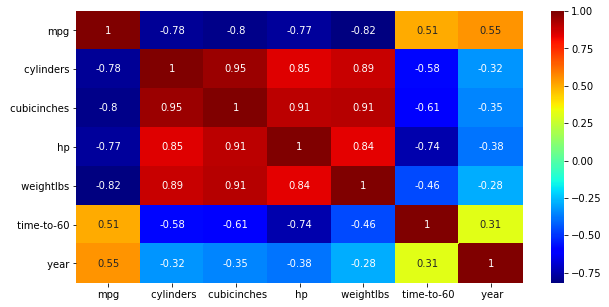

In [ ]:
#Correlation Heat Map
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr, annot=True, ax=ax, cmap='jet')

DATA PREPROCESSING

In [ ]:
#Checking missing values
df.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
dtype: int64

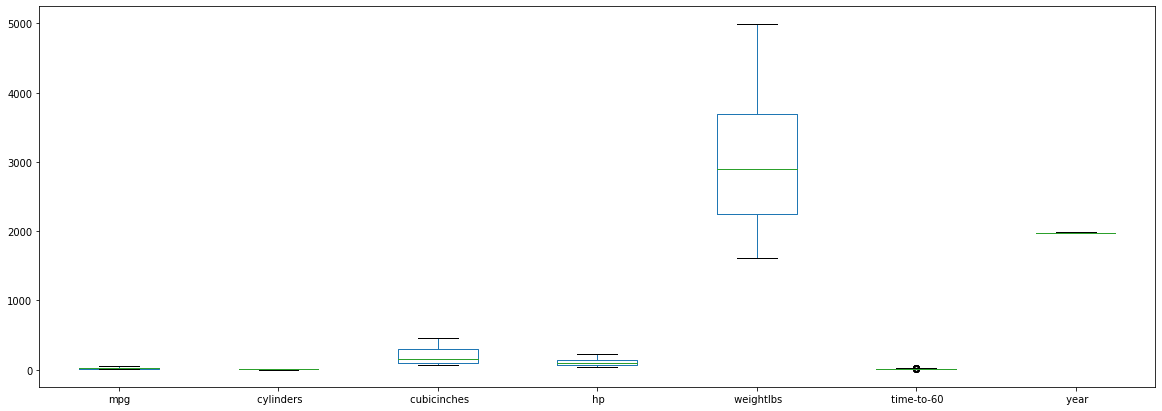

In [ ]:
#Checking for outliers
df.plot(kind='box',figsize=(20,7))
plt.show()

In [ ]:
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.750958,106.360153,3022.134100,15.547893,1976.819923
std,7.823570,1.733310,108.869697,40.499959,857.036976,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3693.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [ ]:
#Applying Standard Scaling
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
X=scaler.fit_transform(df)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6
count,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
mean,3.143505e-16,2.124737e-16,5.997757e-17,9.831429e-17,-5.232086e-17,-2.043916e-16,-2.605329e-15
std,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00
min,-1.683385e+00,-1.497144e+00,-1.221699e+00,-1.493239e+00,-1.647352e+00,-2.598203e+00,-1.602966e+00
25%,-7.997404e-01,-9.191048e-01,-9.180020e-01,-7.758132e-01,-8.979891e-01,-5.328295e-01,-7.766842e-01
50%,-1.466117e-01,2.369740e-01,-4.118404e-01,-2.810368e-01,-1.381050e-01,1.556284e-01,4.959804e-02
75%,7.242265e-01,1.393053e+00,9.317888e-01,7.827325e-01,7.842775e-01,4.998573e-01,8.758803e-01
max,3.003774e+00,1.393053e+00,2.339839e+00,3.058704e+00,2.308722e+00,3.253689e+00,1.702163e+00


K MEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

In [ ]:
# Using kmeans++ to find no: of clusters
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init= 'k-means++', random_state= 42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)

194503699.73172414
48330048.409950554
23486145.115754455
12504926.95470238
9116810.766384596
6746303.184096388
5033305.571435187
3765979.263003238
3169178.1249673567
2673491.9373097657


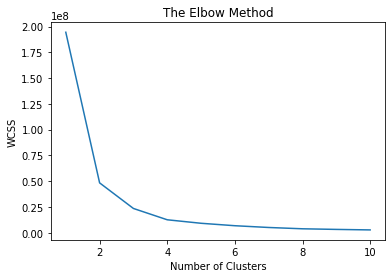

In [ ]:
#Elbow method
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# We can apply k means with optimum number of clusters as 3
kmeans= KMeans(n_clusters=3, init='k-means++', random_state =42)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2,
       2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1,
       0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0,
       2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2,
       0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 2],
      dtype=int32)

In [ ]:
X = np.array(df)
type(X)

numpy.ndarray

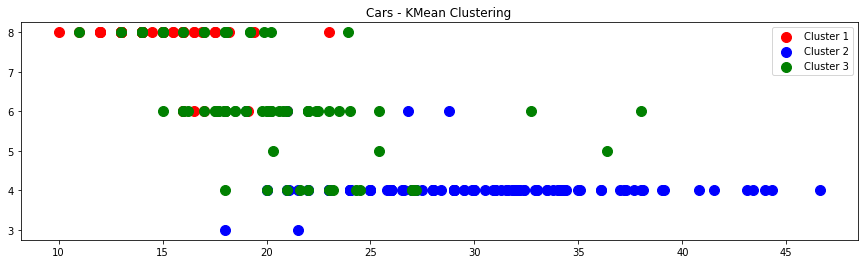

In [ ]:
#Plotting the clusters
plt.figure (figsize=(15,4))
plt.scatter(X[y_kmeans ==0,0], X[y_kmeans ==0,1], s=100,c='red', label='Cluster 1')
plt.scatter(X[y_kmeans ==1,0], X[y_kmeans ==1,1], s=100,c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans ==2,0], X[y_kmeans ==2,1], s=100,c='green', label='Cluster 3')
plt.title('Cars - KMean Clustering')
plt.legend()
plt.show()

AGGLOMERATIVE HIERARCHICAL CLUSTERING

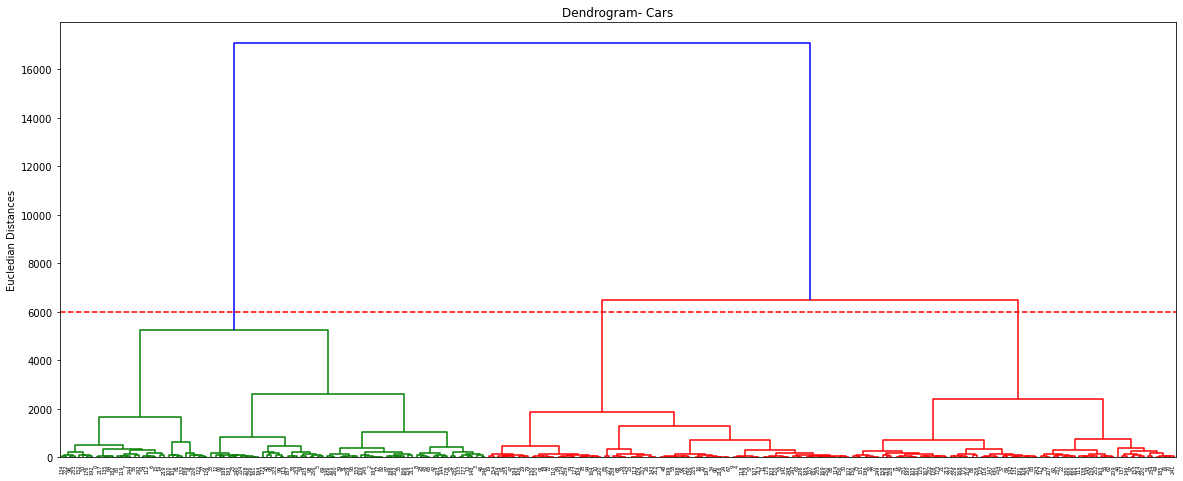

In [ ]:
#Plotting the Dendrogram
import scipy.cluster.hierarchy as sch
plt.figure (figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram- Cars')
plt.ylabel('Eucledian Distances')
plt.hlines(6000,0,16000,colors="r",linestyle="dashed")
plt.show()

In [ ]:
# Taking optimal number of cluster= 3
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=4, affinity='euclidean' , linkage='ward')
y_hc= hc.fit_predict(X)
y_hc

array([3, 2, 0, 0, 2, 0, 3, 3, 0, 2, 2, 2, 0, 0, 3, 3, 2, 0, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 3, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 3, 0, 0,
       1, 1, 0, 2, 2, 1, 3, 1, 0, 2, 3, 3, 1, 2, 2, 0, 1, 2, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 3, 3, 0, 1, 2, 2, 1, 0,
       2, 1, 2, 2, 0, 0, 2, 0, 3, 1, 0, 0, 3, 3, 2, 2, 2, 1, 2, 2, 1, 0,
       2, 1, 3, 2, 2, 0, 1, 1, 2, 3, 2, 2, 3, 1, 2, 1, 3, 2, 1, 2, 2, 1,
       3, 0, 3, 3, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 3, 1,
       2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 2,
       3, 0, 0, 2, 1, 2, 3, 0, 2, 1, 0, 0, 0, 3, 1, 1, 3, 0, 0, 2, 1, 2,
       2, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 3, 1, 3,
       1, 1, 3, 0, 0, 2, 3, 2, 1, 1, 0, 1, 1, 3, 1, 2, 0, 1, 2, 2, 0, 1,
       3, 1, 3, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 0])

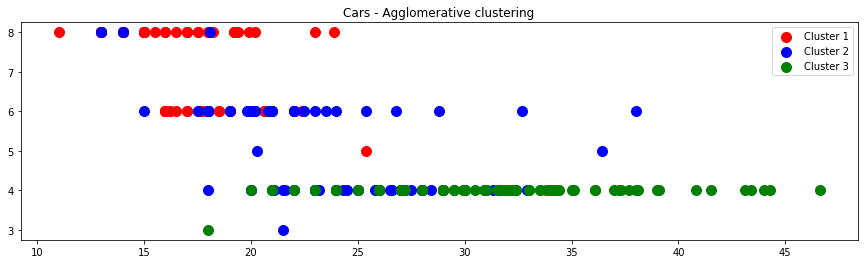

In [ ]:
#Plotting the Clusters
plt.figure (figsize=(15,4))
plt.scatter(X[y_hc ==0,0], X[y_hc ==0,1], s=100,c='red', label='Cluster 1')
plt.scatter(X[y_hc ==1,0], X[y_hc ==1,1], s=100,c='blue', label='Cluster 2')
plt.scatter(X[y_hc ==2,0], X[y_hc ==2,1], s=100,c='green', label='Cluster 3')
plt.title('Cars - Agglomerative clustering')
plt.legend()
plt.show()

Dataset - cars.csv



Steps Performed:

1)Loading the data

2)Feature Description

3)Data Visualization

4)Checking for Missing values

5)Checking for Outliers

6)Standard scaling

7)Two models were built using:

i. KMeans Clustering with optimal number of cluster as 3

ii. Agglomerative Hierarchical Clustering with optimal number of cluster as 3 